# Analyse of a `run.card`

Read the `run.card` log file of a simulation and produces a few plots

### SVN information

In [1]:
SVN = {
    'Author'  : "$Author$",
    'Date'    : "$Date$",
    'Revision': "$Revision$",
    'Id'      : "$Id$",
    'HeadURL' : "$HeadUrl:  $"
    }

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import configparser
from datetime import datetime

## Choose the `run.card`file to read

In [3]:
#CardFile = '/Users/marti/run.card' 
#CardFile = '/Users/marti/Unix/CM61-LR-H6k-Vdyn05_run.card'
CardFile = '/Users/marti/CM61-LR-H6k-Vdyn02_run.card'

## Reading the file

### Reading the file at format `.ini`
To get informations about the simulation

In [4]:
MyReader = configparser.ConfigParser ()
MyReader.optionxform = str # To keep capitals

MyReader.read (CardFile)

SubmitPath      = MyReader['Configuration']['SubmitPath']
JobName         = SubmitPath.split('/')[-1]
PeriodDateBegin = MyReader['Configuration']['PeriodDateBegin']
PeriodDateEnd   = MyReader['Configuration']['PeriodDateEnd']

print ( f'{SubmitPath = }' )
print ( f'{JobName    = }' )

SubmitPath = '/ccc/cont003/home/gen12006/p25pasb/TRHOL/IPSLV.1.11/modipsl/config/IPSLCM6/CM61-LR-H6k-Vdyn02'
JobName    = 'CM61-LR-H6k-Vdyn02'


## Reading data

### Find the number of header lines to skip

In [5]:
fic = open ( CardFile, 'r' )
nbl=0
for ligne in fic.readlines () :
    nbl+=1
    if 'RealCpuTime' in ligne : break
fic.close()
print ( f'{nbl=}' )

nbl=34


### Reading the data

In [6]:
skip_l = np.append ( np.arange (nbl-1), nbl )
parse_dates = ['PeriodDateBegin', 'PeriodDateEnd', 'RunDateBegin', 'RunDateEnd']
df = pd.read_csv (CardFile , skiprows=skip_l, delim_whitespace=True, parse_dates=parse_dates)

## Plotting time evolution

Text(0.5, 0.98, 'CM61-LR-H6k-Vdyn02 - CPU Time')

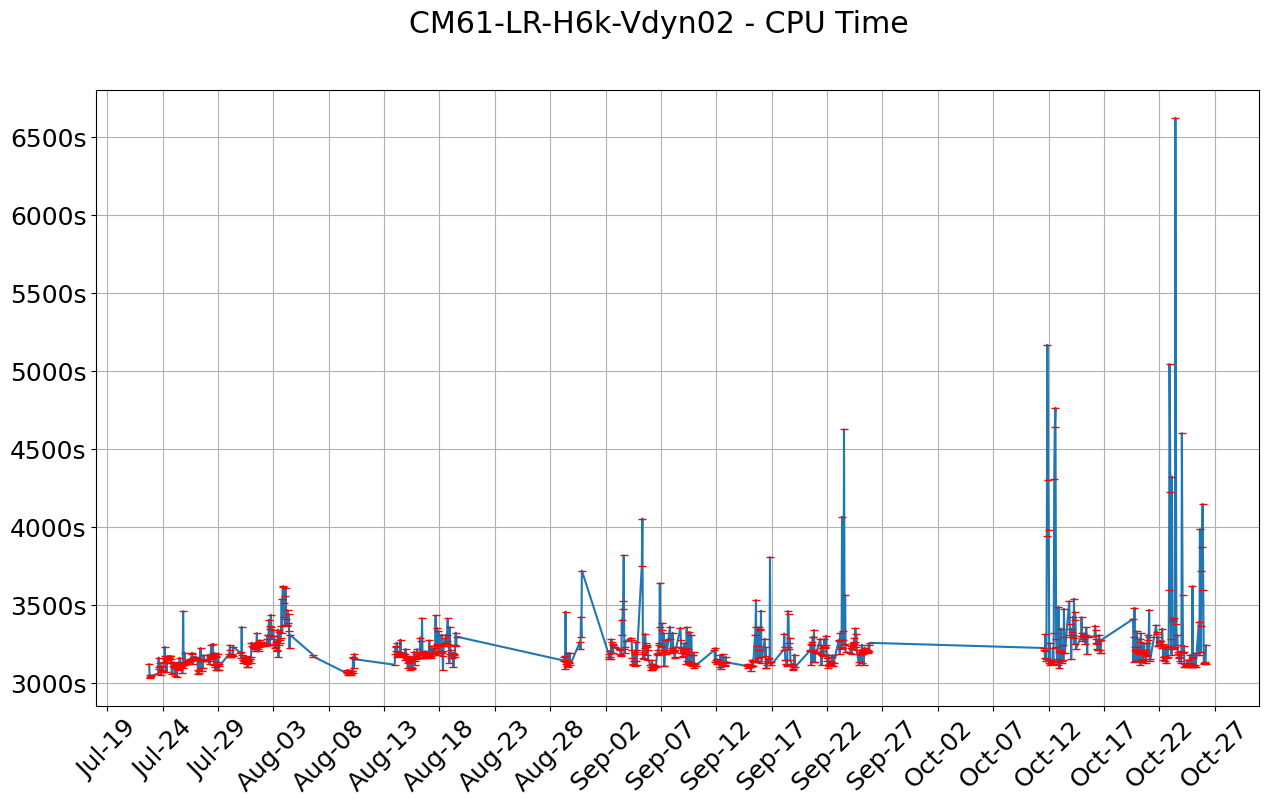

In [10]:
plt.rcParams['font.size'] = 18
fig, ax = plt.subplots (1, 1, figsize=(15,8))

ax.plot ( df.RunDateBegin, df.RealCpuTime, marker='_', markeredgecolor='red' )

locator   = mpl.dates.DayLocator (interval=5)
formatter = mpl.dates.DateFormatter("%b-%d")

ax.xaxis.set_major_formatter (formatter)
ax.xaxis.set_major_locator (locator)
ax.tick_params (axis='x', labelrotation=45 )

ax.yaxis.set_major_formatter (mpl.ticker.StrMethodFormatter ('{x:3.0f}s'))

ax.grid()
plt.savefig ( f'{JobName}_run_card_serie.png' )

plt.suptitle ( f'{JobName} - CPU Time' )

## Histogram

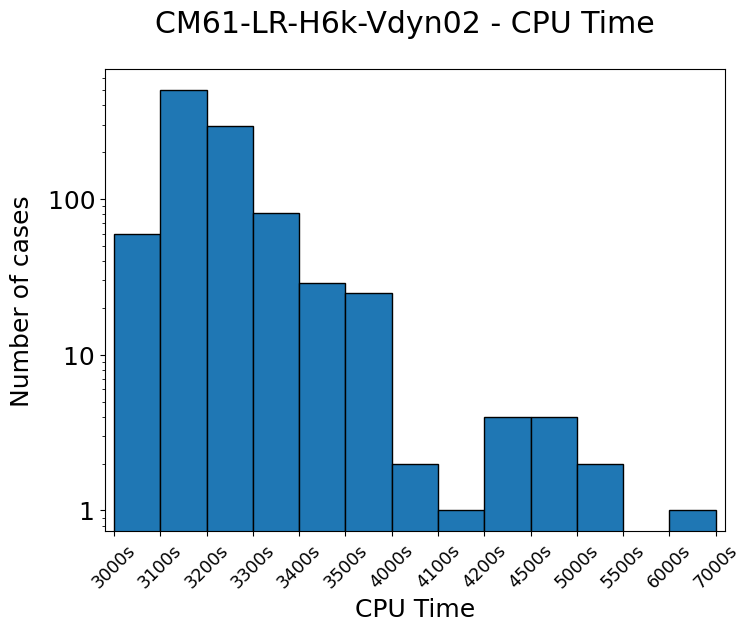

In [12]:
fig, ax = plt.subplots (1, 1, figsize=(8,6))
plt.tight_layout

#classes = [0, 2700, 2800, 2900, 3000, 3500, 4000, 4500, 5000, 1000000]
classes = [0, 3000, 3100, 3200, 3300, 3400, 3500, 4000, 4100, 4200, 4500, 5000, 5500, 6000, 7000, 1000000]

nbins = len(classes)
counts, bins = np.histogram (df.RealCpuTime[:], bins=classes, )
mbar = ax.bar ( np.arange(nbins-1), height=counts, width=1, edgecolor='k')

ax.set_xlim (0.3, nbins-2.3)

labels=[f'{x:3.0f}s' for x in classes]
ax.set_xlabel ('CPU Time')
ax.set_xticks ( np.arange(nbins-2)+0.5, labels=labels[1:-1], ha='center', fontsize='x-small')
ax.tick_params(axis='x', labelrotation=45)

ax.set_yscale ('log')
ax.set_ylabel ('Number of cases')
ax.yaxis.set_major_formatter (mpl.ticker.StrMethodFormatter ('{x:4.0f}'))

plt.suptitle ( f'{JobName} - CPU Time' )
plt.savefig ( f'{JobName}_run_card_histo.png' )

## To Do

- Implement the possibility to access `run.card` file by http, in the MONITORING folder 